In [48]:
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

df = pd.read_csv(path + '/Housing.csv')


0.6132752494107068
1013968.579587156
1954727417859.5308


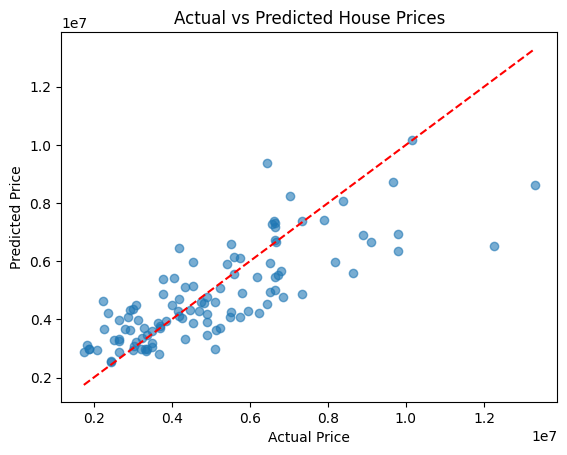

In [49]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('price', axis=1)
y= df_encoded["price"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor(n_estimators=200,random_state=42)
rf_model.fit(X_train,y_train)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np

y_pred = rf_model.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

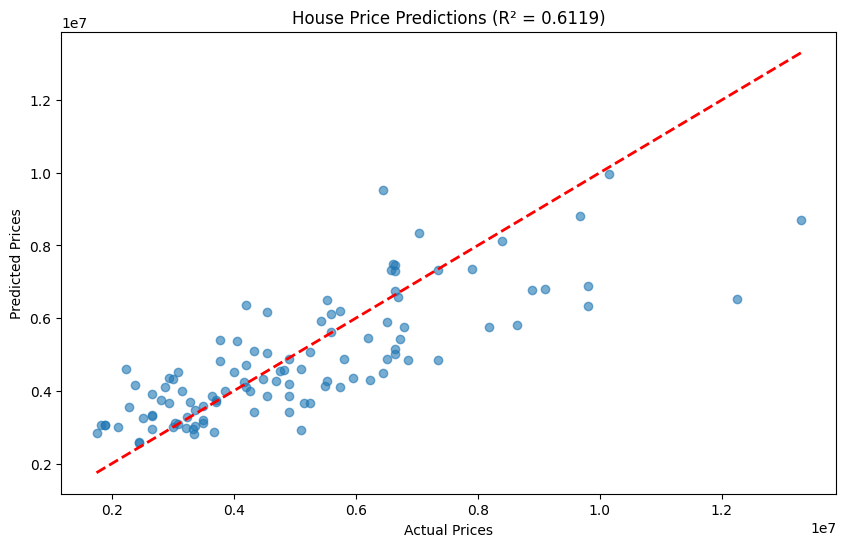

0.611918531405699
1021546.0353211008
1961585044320.3433


In [50]:
# Complete workflow
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and prepare data
#df = pd.read_csv('Housing.csv')
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np
# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'House Price Predictions (R² = {r2:.4f})')
plt.show()

print(r2)
print(MAE)
print(MSE)